In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# 数据初始化
np.random.seed(0)
# 每个类点的个数
N = 100
# 维度
D = 2
# 类的个数
K = 3
X = np.zeros(((N*K),D))
y = np.zeros(N*K,dtype='uint8')

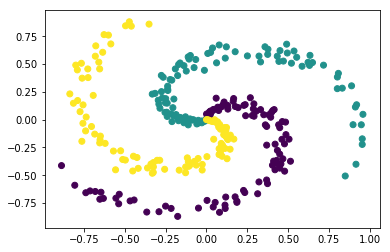

In [8]:
# 构造数据集
for j in range(K):
    ix = range(N*j,N*(j+1))
    # 半径
    r = np.linspace(0,1,N)
    # theta
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N) * 0.2
    X[ix] = np.c_[r*np.sin(t),r*np.cos(t)]
    y[ix] = j

plt.scatter(X[:,0],X[:,1],c=y)

In [57]:
# 隐藏层的大小
h = 100
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

In [62]:
# 步长
step_size = 0.001
# 正则化强度
reg = 1e-3

In [63]:
# 梯度下降
num_examples = X.shape[0]
for i in range(2001):
    # relu激活函数，shape：300*100
    hidden_layer = np.maximum(0,np.dot(X,W)+b)
    # 得到第二层隐藏层的阈值，shape：300*3
    scores = np.dot(hidden_layer,W2) + b2
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores,axis=1,keepdims=True)

    # 计算损失值：平均交叉熵损失和正则化
    corect_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(corect_logprobs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W * W) + 0.5 * reg * np.sum(W2 * W2)
    loss = data_loss + reg_loss
    if i % 100 == 0:
        print("iteration %d: loss %f" % (i, loss))

    # 计算梯度的分数
    dscores = probs
    # soft_max导数值
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples

    # 反向传播
    # 首先反向更新W2和b2,relu在大于0时导数为1，所以gj=dscores，bh=hidden_layer
    dW2 = np.dot(hidden_layer.T,dscores)
    db2 = np.sum(dscores,axis=0,keepdims=True)
    # 更新W和b
    dhidden = np.dot(dscores,W2.T)
    # 经过relu求导得
    dhidden[dhidden <= 0] = 0
    dW = np.dot(X.T,dhidden)
    db = np.sum(dhidden,axis=0,keepdims=True)

    # 加正则化梯度贡献值
    dW2 += reg * W2
    dW += reg * W

    # 更新参数
    W += - step_size * dW
    b += -step_size * db
    W2 = -step_size * dW2
    b2 = -step_size * db2

iteration 0: loss 1.098622
iteration 100: loss 1.098622
iteration 200: loss 1.098622
iteration 300: loss 1.098622
iteration 400: loss 1.098622
iteration 500: loss 1.098622
iteration 600: loss 1.098622
iteration 700: loss 1.098622
iteration 800: loss 1.098622
iteration 900: loss 1.098622
iteration 1000: loss 1.098622
iteration 1100: loss 1.098622
iteration 1200: loss 1.098622
iteration 1300: loss 1.098622
iteration 1400: loss 1.098622
iteration 1500: loss 1.098622
iteration 1600: loss 1.098622
iteration 1700: loss 1.098622
iteration 1800: loss 1.098622
iteration 1900: loss 1.098622
iteration 2000: loss 1.098622


In [64]:
# 查看预测精度
hidden_layer = np.maximum(0,np.dot(X,W) + b)
scores = np.dot(hidden_layer,W2) + b2
predicted_class = np.argmax(scores,axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.49


(-1.8712034092398278, 1.8687965907601756)

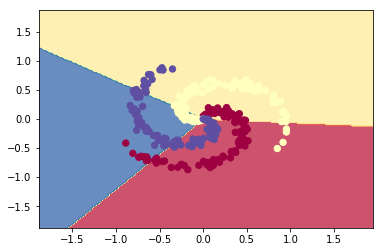

In [65]:
h = 0.02
x_min,x_max = X[:,0].min() - 1,X[:,0].max() + 1
y_min,y_max = X[:,1].min() -1,X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [17]:
from sklearn.neural_network import MLPClassifier

In [82]:
mlpc = MLPClassifier(hidden_layer_sizes=(100,100),
                     solver='sgd',
                     activation='relu',
                     alpha=0.001,
                     learning_rate='constant',
                     learning_rate_init=0.001,
                     max_iter=2000,
                     batch_size=300)

In [83]:
mlpc.fit(X,y)

MLPClassifier(activation='relu', alpha=0.001, batch_size=300, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [86]:
print('training accuracy: %.2f' % (np.mean(mlpc.predict(X)-y)))

training accuracy: 46.08


(-1.8712034092398278, 1.8687965907601756)

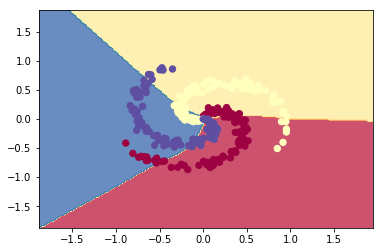

In [85]:
Z = mlpc.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())